In [1]:
import geopandas as gpd
import shapely
import seaborn
import math
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
data = gpd.read_file("../Lab_03/example_dataset.geojson")

In [3]:
import pandas as pd

# read the dataset
data = gpd.read_file("../Lab_03/example_dataset.geojson")

# convert sowing_date column to datetime format
data['sowing_date'] = pd.to_datetime(data['sowing_date'])

# count the number of fields that were not sown in April
not_april = data[data['sowing_date'].dt.month != 4]
num_not_april = len(not_april)
print(f"Number of fields not sown in April: {num_not_april}")


Number of fields not sown in April: 421


In [4]:
import pandas as pd

# Read the dataset
data = gpd.read_file("../Lab_03/example_dataset.geojson")

# Add a new column to the dataframe
data['relative_error'] = abs(data['actual_yield'] - data['model_yield']) / data['model_yield']

# Display the first 10 rows of the updated dataframe
print(data.head(10))


  crop_name sowing_date  actual_yield       field_id  avg_temperature  \
0      maiz  2016-04-10        7600.0   MS_VN_03_407        11.547103   
1      maiz  2016-04-11        7900.0   MS_VN_03_405        11.547103   
2      maiz  2016-04-12        7900.0  PA_KM_05_1802        12.190627   
3      maiz  2016-04-12        9000.0   MS_VN_03_410        11.756031   
4      maiz  2016-04-12       12100.0  KI_VN_10_0308        11.584644   
5      maiz  2016-04-13        7000.0  PA_KM_05_1803        12.190627   
6      maiz  2016-04-13        6400.0  PA_KM_05_1801        12.190627   
7      maiz  2016-04-13        7300.0   MS_VN_03_409        11.756031   
8      maiz  2016-04-13       11700.0  KI_VN_10_0302        11.584644   
9      maiz  2016-04-14        7100.0  PA_KM_05_1804        12.190627   

   avg_rainfall  model_yield  \
0    572.463009       8903.0   
1    574.831401       8814.0   
2    637.703767       8317.0   
3    588.947718       8878.0   
4    595.795305       8996.0   
5   

In [5]:
import geopandas as gpd
import shapely
import seaborn as sns

# Read the dataset
data = gpd.read_file("../Lab_03/example_dataset.geojson")

# Add a column for relative error
data['relative_error'] = abs(data['actual_yield'] - data['model_yield']) / data['actual_yield']

# Get the field with the largest relative error
max_error_field = data.loc[data['relative_error'].idxmax()]

# Get the field with the smallest relative error
min_error_field = data.loc[data['relative_error'].idxmin()]

# Display information about the fields with the largest and smallest relative errors
print("Field with largest relative error:")
print(max_error_field[['field_id', 'crop_name', 'actual_yield', 'model_yield', 'relative_error']])

print("\nField with smallest relative error:")
print(min_error_field[['field_id', 'crop_name', 'actual_yield', 'model_yield', 'relative_error']])


Field with largest relative error:
field_id          KI_VN_08_405
crop_name                 maiz
actual_yield            1500.0
model_yield             6262.0
relative_error        3.174667
Name: 213, dtype: object

Field with smallest relative error:
field_id          KI_VN_10_0702
crop_name                   soy
actual_yield             2600.0
model_yield              2603.0
relative_error         0.001154
Name: 991, dtype: object


In [38]:
data = data.to_crs(epsg=32632) 
centroids = data.geometry.centroid

In [39]:
import geopandas as gpd

# Load the shapefile into a GeoDataFrame
data = gpd.read_file("../Lab_03/example_dataset.geojson")

# Calculate the centroids for each field
centroids = data.geometry.centroid

# Add the centroids as a new column to the GeoDataFrame
data['centroid'] = centroids


/tmp/ipykernel_28043/2707889535.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = data.geometry.centroid


In [48]:
# Import necessary libraries
import geopandas as gpd
import pyproj

# Read in the data with geographic CRS
data = gpd.read_file("../Lab_03/example_dataset.geojson")

# Define the projected CRS you want to use
utm_zone_crs = pyproj.CRS("EPSG:4326")

# Reproject the geometry data to the UTM CRS
data = data.to_crs(utm_zone_crs)

# Calculate the centroids of the reprojected data
centroids = data.geometry.centroid

# Print the centroids
print(centroids)


0      POINT (28.16355 49.21292)
1      POINT (28.15958 49.20348)
2      POINT (27.29955 48.87375)
3      POINT (28.12311 49.20752)
4      POINT (28.85473 49.21875)
                 ...            
995    POINT (29.54140 48.17644)
996    POINT (29.54898 48.17944)
997    POINT (29.54167 48.19322)
998    POINT (27.11957 48.63747)
999    POINT (29.44174 48.26802)
Length: 1000, dtype: geometry


/tmp/ipykernel_28043/2734981631.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = data.geometry.centroid


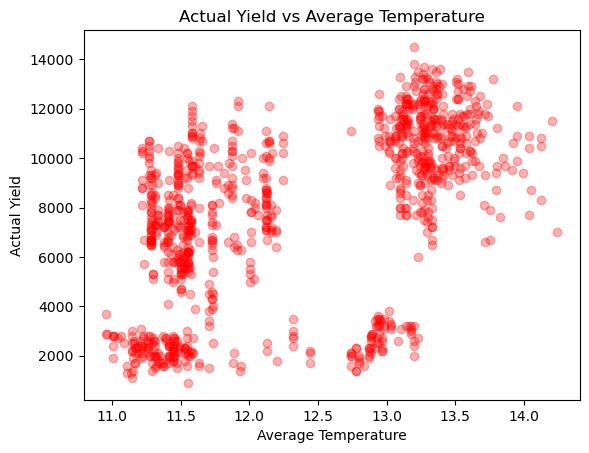

In [18]:
import matplotlib.pyplot as plt

# create a scatter plot of actual_yield vs avg_temperature
plt.scatter(data['avg_temperature'], data['actual_yield'], color='red', alpha=0.3)

# set x-axis and y-axis labels
plt.xlabel('Average Temperature')
plt.ylabel('Actual Yield')

# set plot title
plt.title('Actual Yield vs Average Temperature')

# display the plot
plt.show()


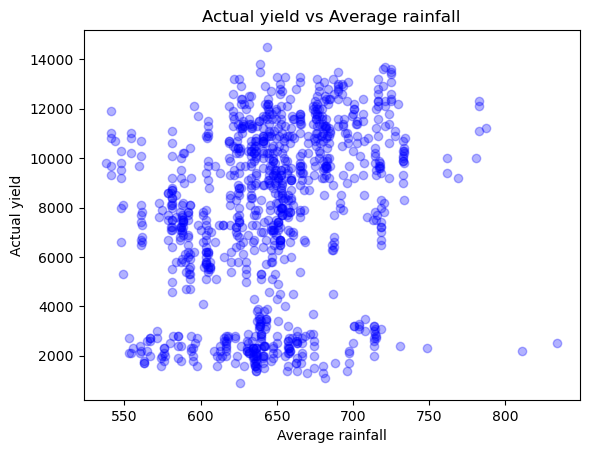

In [17]:
import matplotlib.pyplot as plt

# create a scatter plot of actual_yield vs avg_rainfall
plt.scatter(data['avg_rainfall'], data['actual_yield'], color='blue', alpha=0.3)

# set the x and y axis labels
plt.xlabel('Average rainfall')
plt.ylabel('Actual yield')

# set the title of the plot
plt.title('Actual yield vs Average rainfall')

# display the plot
plt.show()


In [ ]:
data.to_file("../dataset/updated_dataset.geojson", driver='GeoJSON')